# Quantitative Biology and Biophysics (AS.020.618)	Spring 2025
## Lab #1
## January 24, 2025

#  Distributions and Approximations

In class, we discussed the binomial distribution, and how if we have a large N, it approximates a continuous distribution that can approximate a Gaussian distribution. We also discussed some useful approximations: Sterlings approximation & the Taylor Expansion. In this lab, you will explore the properties of these distributions and approximations to hopefully gain a better understanding of their properties.

# Libraries you will need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import factorial
from scipy.stats import binom
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.notebook import tqdm

# Discrete vs. Continuous variables

When creating vectors, sometimes you need to create vectors of discrete variables (such as number of animals) vs. continuous variables (such as mass). There are two useful functions for doing this:

 ### For discrete values:

`np.arange(start,end_exclusive)`

Example: `np.arange(0,10)` will produce a vector of integers from 0 to 9


 ### For continuous values:

`np.linspace(start,end_inclusive)`

Example: `np.linspace(0,10)` will produce a vector of 50 evenly spaced values from 0 to 10. The default number of values is 50, so if you want to specify this for X evenly spaced values, use `np.linspace(0,10, num=X)`.


# Problem 1: The Binomial Distribution

As I mentioned in class, this is a useful distribution when making predictions for binary phenomena. A common problem encountered in biology is making crosses, and deciding how many animals to screen for a particular genotype. Here is a common scenario:

You want to make a double recessive mutant for alleles A & B.

First, you cross mutant A with mutant B:

P0 generation: aaBB x AAbb

This produces heterozygous progeny:

F1 generation: AaBb

You then take siblings from this generation and cross them.

**What is the probability of finding an F2 animal that is homozygous dominant for A (i.e. AA)?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [2]:
P_AA = 0.25

**What is the probability of finding an F2 animal that is homozygous recessive for B (i.e. bb)?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [3]:
P_bb = 0.25

**What is the probability of finding an F2 animal with the AAbb genotype?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [5]:
P_AAbb = P_AA * P_bb
P_AAbb

0.0625

Let's look at the possible outcomes of picking 20 animals. **Given the above probability, what is the expected mean (µ) probability for picking a double homozygous recessive animal if you pick 20 animals total? What is the variance (σ^2)?**

## <font color='red'>Student Input Cell: 3 points</font> 

In [8]:
mu_aabb = 20 * P_AAbb
print(mu_aabb)
variance_aabb = 20*P_AAbb * (1-P_AAbb)
print(variance_aabb)

1.25
1.171875


**Now let's plot what this distribution of possible outcomes looks like for picking 0->20 animals.** To make the coding easier, rather than coding the entire formula from class, you can use scipy's `binom.pmf` function which you imported above.

`P = binom.pmf(k, N, p)`

Check to see whether the values for your mean and standard deviation match what you expect with your distribution.


## <font color='red'>Student Input Cell: 4 points</font> 

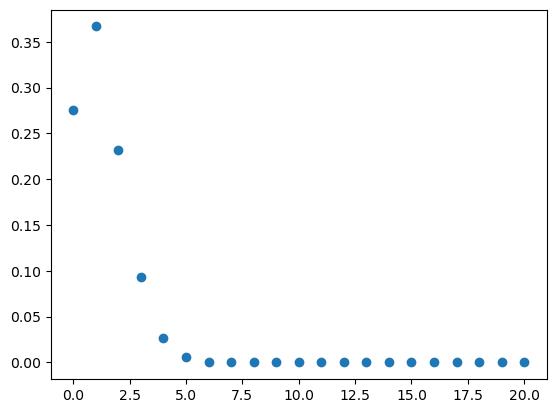

In [9]:
# k needs to be integers
binom_probabilities = []
for k in np.arange(0,21):
    P = binom.pmf(k,20,P_AAbb)
    binom_probabilities.append(P)


# Plot binomial distribution
# Since this is a DISCRETE distribution, you should plot markers, and not lines.
# i.e. plt.plot(k,p,'o')
plt.plot(np.arange(0,21),binom_probabilities,"o")

**What is the probability of NOT finding an aabb F2?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [13]:
P_not_aabb = binom_probabilities[0]
P_not_aabb

np.float64(0.2750587898883363)

**What is the probability of picking AT LEAST 1 aabb F2?**

## <font color='red'>Student Input Cell: 1 point</font> 

In [14]:
P_at_least_aabb = 1-P_not_aabb
P_at_least_aabb

np.float64(0.7249412101116637)